---
# Setup
---

In [ ]:
!pip install ipywidgets matplotlib scipy seaborn pyreadstat

---
# Studentsche t-Verteilung
---

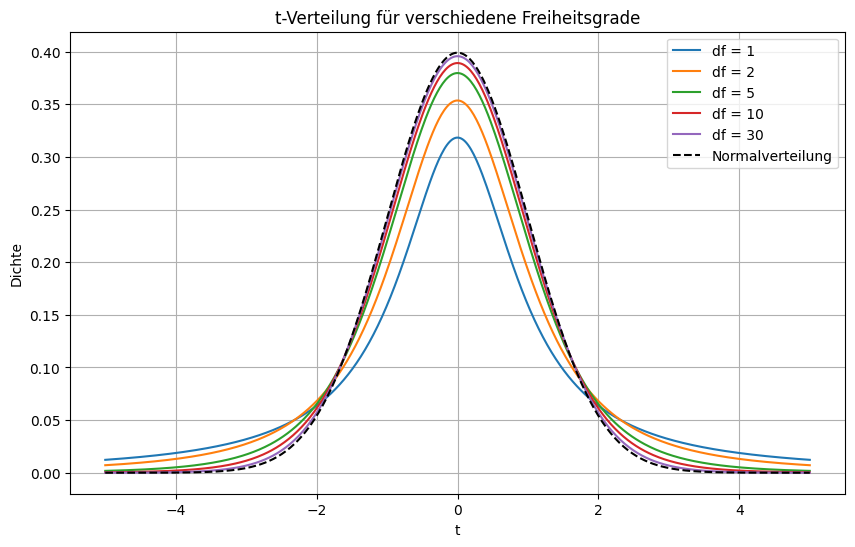

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Degrees of freedom (the higher, the closer to the normal distribution)
dfs = [1, 2, 5, 10, 30]

# x-values
x = np.linspace(-5, 5, 500)

# Plot the t-distribution for different degrees of freedom
plt.figure(figsize=(10, 6))
for df in dfs:
    plt.plot(x, t.pdf(x, df), label=f'df = {df}')

# Plot the normal distribution for comparison
from scipy.stats import norm
plt.plot(x, norm.pdf(x), 'k--', label='Normalverteilung')

plt.title("t-Verteilung für verschiedene Freiheitsgrade")
plt.xlabel("t")
plt.ylabel("Dichte")
plt.legend()
plt.grid(True)
plt.show()

---
# Interaktives Widget zur Veranschaulichung von PDF und CDF
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Set plot style
sns.set(style="whitegrid")

# Interactive plotting function
def plot_t_and_cdf(t_val=2.0, df=10):
    x = np.linspace(-5, 5, 1000)
    pdf = t.pdf(x, df)
    cdf = t.cdf(x, df)
    cdf_val = t.cdf(t_val, df)
    p_val = 2 * (1 - cdf_val) # two-tailed p-value
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    # --- PDF ---
    axs[0].plot(x, pdf, color='steelblue', lw=2, label='t-Dichte')
    axs[0].fill_between(x, 0, pdf, where=(x <= -abs(t_val)) | (x >= abs(t_val)), 
                        color='red', alpha=0.3, label=f'p ≈ {p_val:.3f}')
    axs[0].axvline(-abs(t_val), color='black', linestyle='--', label=f't = ±{abs(t_val)}')
    axs[0].axvline(abs(t_val), color='black', linestyle='--')
    axs[0].set_title("t-Verteilung (PDF)", fontsize=14, weight='bold')
    axs[0].set_xlabel("t-Wert")
    axs[0].set_ylabel("Dichte")
    axs[0].legend()
    axs[0].grid(True)
    
    # --- CDF ---
    axs[1].plot(x, cdf, color='seagreen', lw=2, label='t-CDF')
    axs[1].axvline(t_val, color='black', linestyle='--', label=f't = {t_val}')
    axs[1].hlines(cdf_val, x[0], t_val, color='black', linestyle=':')
    axs[1].set_title("Kumulative Verteilungsfunktion (CDF)", fontsize=14, weight='bold')
    axs[1].set_xlabel("t-Wert")
    axs[1].set_ylabel("P(T ≤ t)")
    axs[1].legend()
    axs[1].grid(True)

    plt.suptitle(f"Freiheitsgrade (df) = {df}, beobachteter t-Wert = {t_val}", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

# Interactive widgets
t_slider = widgets.FloatSlider(value=2.0, min=-4.0, max=4.0, step=0.1, description='t-Wert:')
df_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='df:')

# Combine widgets and display output
ui = widgets.HBox([t_slider, df_slider])
out = widgets.interactive_output(plot_t_and_cdf, {'t_val': t_slider, 'df': df_slider})

display(ui, out)

Output()

---
# Soziale Herkunft und Lebenszufriedenheit
---

Literatur: https://doi.org/10.1007/978-3-658-33177-1_3  
Daten: https://search.gesis.org/research_data/ZA4584

In [3]:
import numpy as np
import pandas as pd
import pyreadstat
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [4]:
# Load the dataset
df, meta = pyreadstat.read_por("./data/ZA4584_v1-0-0.por/ZA4584_v1-0-0.por")

---
# Verteilung der allgemeinen Lebenszufriedenheit
---

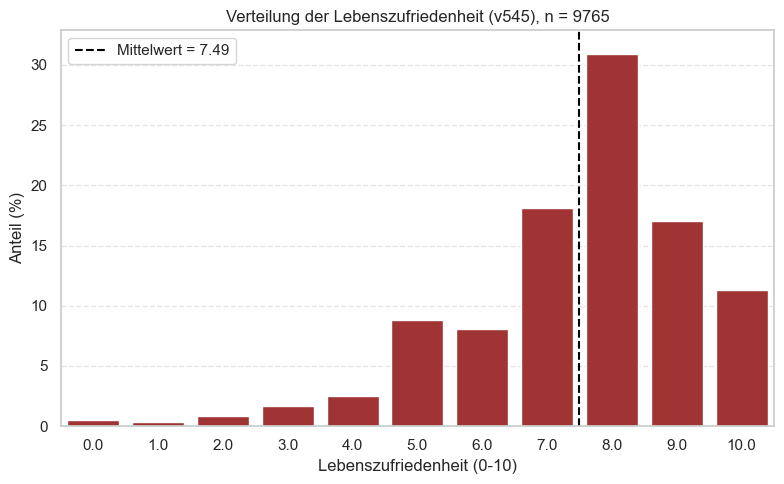

In [5]:
# Drop NaNs and keep scores <= 10
valid_scores = df['V545'].dropna()
valid_scores = valid_scores[(valid_scores <= 10)]

# Calculate percentage distribution
percentage_distribution = valid_scores.value_counts(normalize=True).sort_index() * 100

# Calculate mean
mean_value = valid_scores.mean()
n = len(valid_scores)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, color='firebrick') # https://matplotlib.org/stable/gallery/color/named_colors.html
plt.title(f'Verteilung der Lebenszufriedenheit (v545), n = {n}')
plt.xlabel('Lebenszufriedenheit (0-10)')
plt.ylabel('Anteil (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, percentage_distribution.max() + 2)  # Add some headroom
plt.xticks(range(0, 11))

# Add mean line
plt.axvline(mean_value, color='black', linestyle='--', label=f'Mittelwert = {mean_value:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

---
# Daten filtern nach Bildungsabschluss des Vaters
---

In [6]:
# Define survey years of interest
selected_years = [2010, 2012, 2014]

# Filter the dataset to include only relevant years
df_filtered = df[df['YEAR'].isin(selected_years)]

# Map father's education levels to labels
fathers_education_levels = {
    'Kein Abschluss (Vater)': [1],
    'Hauptschule (Vater)': [2],
    'Mittlere Reife (Vater)': [3],
    '(Fach-)Hochschulreife (Vater)': [4, 5],
}

# Extract respondents' life satisfaction scores (V545) by father's education
life_satisfaction_by_fathers_education = {
    label: df_filtered[df_filtered['V1234'].isin(codes)]['V545']
            .loc[lambda s: s <= 10]  # keep valid satisfaction scores (0–10)
    for label, codes in fathers_education_levels.items()
}

# Optionally access each group as a Series
kein_abschluss_vater = life_satisfaction_by_fathers_education['Kein Abschluss (Vater)']
hauptschule_vater = life_satisfaction_by_fathers_education['Hauptschule (Vater)']
mittlere_reife_vater = life_satisfaction_by_fathers_education['Mittlere Reife (Vater)']
hochschulreife_vater = life_satisfaction_by_fathers_education['(Fach-)Hochschulreife (Vater)']

---
# Verteilung der allgemeinen Lebenszufriedenheit (Hochschulreife vs. Hauptschule)
---

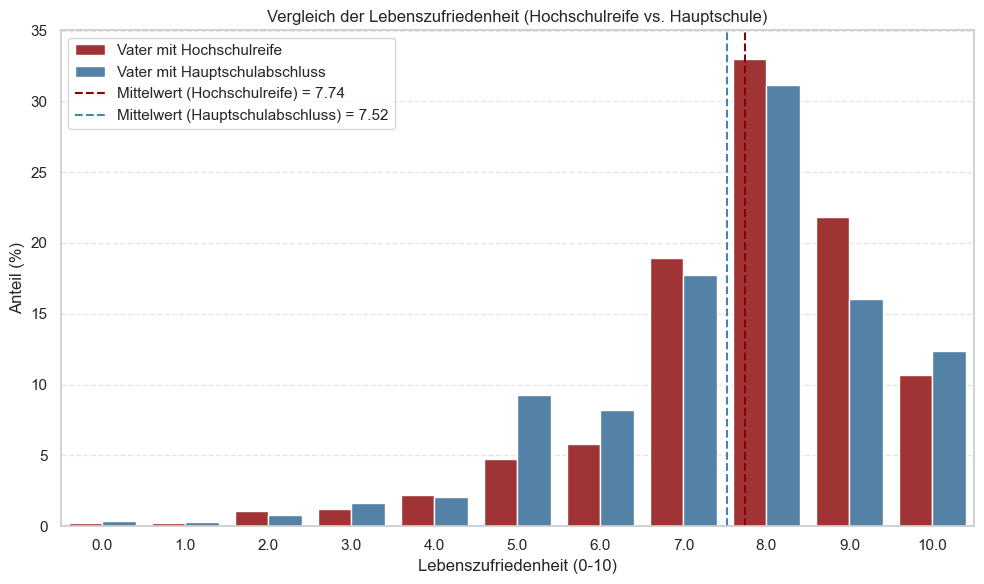

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaNs and keep scores <= 10 for both columns
df_cleaned = df[['V545', 'V546']].copy()
df_cleaned = df_cleaned[(df_cleaned['V545'].notna()) & (df_cleaned['V546'].notna())]
df_cleaned = df_cleaned[(df_cleaned['V545'] <= 10) & (df_cleaned['V546'] <= 10)]

# Calculate percentage distributions
dist_1 = df_cleaned['V545'].value_counts(normalize=True).sort_index() * 100
dist_2 = df_cleaned['V546'].value_counts(normalize=True).sort_index() * 100

hochschulreife_vater_percentage_distribution = hochschulreife_vater.value_counts(normalize=True).sort_index() * 100
hauptschule_vater_percentage_distribution = hauptschule_vater.value_counts(normalize=True).sort_index() * 100


# Create a DataFrame suitable for seaborn
plot_df = pd.DataFrame({
    'Score': hochschulreife_vater_percentage_distribution.index.tolist() + hauptschule_vater_percentage_distribution.index.tolist(),
    'Percentage': hochschulreife_vater_percentage_distribution.tolist() + hauptschule_vater_percentage_distribution.tolist(),
    'Source': ['Vater mit Hochschulreife'] * len(hochschulreife_vater_percentage_distribution) + ['Vater mit Hauptschulabschluss'] * len(hauptschule_vater_percentage_distribution)
})

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Score', y='Percentage', hue='Source', palette=['firebrick', 'steelblue'])

plt.title('Vergleich der Lebenszufriedenheit (Hochschulreife vs. Hauptschule)')
plt.xlabel('Lebenszufriedenheit (0-10)')
plt.ylabel('Anteil (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(plot_df['Percentage']) + 2)
plt.xticks(range(0, 11))

# Add mean lines (optional)
mean_hochschulreife_vater = hochschulreife_vater.mean()
mean_hauptschule_vater = hauptschule_vater.mean()
plt.axvline(mean_hochschulreife_vater, color='darkred', linestyle='--', label=f'Mittelwert (Hochschulreife) = {mean_hochschulreife_vater:.2f}')
plt.axvline(mean_hauptschule_vater, color='steelblue', linestyle='--', label=f'Mittelwert (Hauptschulabschluss) = {mean_hauptschule_vater:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

---
# Überprüfen der Varianzhomogenität
---

In [8]:
# Perform Levene’s test for equal variances
stat, p_levene = stats.levene(hochschulreife_vater.dropna(), hauptschule_vater.dropna())
print(f"Levene's test p-value: {p_levene:.4f}")

if p_levene < 0.05:
    print("Variances are significantly different — use Welch's t-test.")
    equal_var = False
else:
    print("Variances are similar — Student's t-test is reasonable.")
    equal_var = True

Levene's test p-value: 0.0000
Variances are significantly different — use Welch's t-test.


---
# Welch Test
---

Voraussetzungen:
- Kardinalskalierung: Intervall- oder Verhältnisskala
- ${\displaystyle X_{1},\ldots ,X_{n}}$ und ${\displaystyle Y_{1}\ldots ,Y_{m}}$ unabhängig voneinander
- ${\displaystyle X_{i}\sim {\mathcal {N}}(\mu _{X};\sigma )\,}$ oder ${\displaystyle X_{i}\sim (\mu _{X};\sigma )\,}$ mit $n>30$
- ${\displaystyle Y_{j}\sim {\mathcal {N}}(\mu _{Y};\sigma )\,}$ oder ${\displaystyle Y_{j}\sim (\mu _{Y};\sigma )\,}$ mit $m>30$
- ${\displaystyle \sigma _{X}\neq \sigma _{Y}}$ unbekannt

Zweiseitiger Test: 
$$
{\displaystyle H_{0}:\mu _{X}-\mu _{Y} = \omega _{0}\,} \mathrm{\ vs. \ } {\displaystyle H_{1}:\mu _{X}-\mu _{Y}\neq \omega _{0}\,}
$$

Rechtsseitiger Test: 
$$
{\displaystyle H_{0}:\mu _{X}-\mu _{Y}\leq \omega _{0}\,} \mathrm{\ vs. \ } {\displaystyle H_{1}:\mu _{X}-\mu _{Y}>\omega _{0}\,}
$$

Linksseitiger Test: 
$$
{\displaystyle H_{0}:\mu _{X}-\mu _{Y}\geq \omega _{0}\,} \mathrm{\ vs. \ } {\displaystyle H_{1}:\mu _{X}-\mu _{Y}<\omega _{0}\,}
$$

Teststatistik
$$
{\displaystyle T={\frac {{\overline {X}}-{\overline {Y}}-\omega _{0}}{S}}}
$$

Im Fall ${\displaystyle \mu _{X}-\mu _{Y}=\omega _{0}}$ gilt für die Teststatistik ${\displaystyle T\approx t_{\nu}}$.

Prüfwert:
$$
{\displaystyle t={\frac {{\overline {x}}-{\overline {y}}-\omega _{0}}{s}}}
$$

Aus der Stichprobe berechneten Mittelwerte:
$$
{\displaystyle \bar{x} =\frac{1}{n} \sum_{i=1}^n x_i, \bar{y}=\frac{1}{m} \sum_{i=1}^m y_i}
$$

Standardfehler bzw. Stichprobenstandardabweichung:
$$
{\displaystyle s={\sqrt {{\frac {s_{x}^{2}}{n}}+{\frac {s_{y}^{2}}{m}}}}}
$$

Stichprobenvarianzen:
$$
{\displaystyle s_{x}^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}, {\displaystyle s_{y}^{2}={\frac {1}{m-1}}\sum _{j=1}^{m}(y_{j}-{\overline {y}})^{2}}
$$

Freiheitsgrade nach Welch-Satterthwaite:
$$
{\displaystyle \nu ={\frac {\left({\frac {s_{x}^{2}}{n}}+{\frac {s_{y}^{2}}{m}}\right)^{2}}{{\frac {\left({\frac {s_{x}^{2}}{n}}\right)^{2}}{n-1}}+{\frac {\left({\frac {s_{y}^{2}}{m}}\right)^{2}}{m-1}}}}}
$$

Ablehnungsbereich $H_0$ (zweiseitig):
$$
{\displaystyle \{t|t<-t_{1-\alpha /2;\nu }\}\,} \mathrm{\ oder \ } {\displaystyle \{t|t>t_{1-\alpha /2;\nu }\}\,}
$$

Ablehnungsbereich $H_0$ (rechtsseitig):
$$
{\displaystyle \{t|t>t_{1-\alpha ;\nu }\}\,}
$$

Ablehnungsbereich $H_0$ (linksseitig):
$$
{\displaystyle \{t|t<-t_{1-\alpha ;\nu }\}\,}
$$


In [9]:
t_stat, p_val = stats.ttest_ind(hochschulreife_vater, 
                                hauptschule_vater, 
                                alternative='two-sided', 
                                nan_policy='omit', 
                                equal_var=False)

print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.8f}")

t-statistic: 4.395, p-value: 0.00001148


---
# Alternative (explizitere) Implementierung des Welch Tests
---

**t-Wert bestimmen**

In [10]:
y_mean = hauptschule_vater.mean()
x_mean = hochschulreife_vater.mean()
x_var = np.var(hochschulreife_vater, ddof=1)
x_var = np.var(hochschulreife_vater, ddof=1)
var = np.var(hochschulreife_vater, ddof=1) / len(hochschulreife_vater) + np.var(hauptschule_vater, ddof=1) / len(hauptschule_vater)
s = np.sqrt(var)
t = (x_mean - y_mean) / s
print(f"{t:.3f}")

4.395


**Freiheitsgrade nach Welch-Satterthwaite bestimmen**

In [11]:
# Degrees of freedom acc. to Welch-Satterthwaite
nx, ny = len(hochschulreife_vater), len(hauptschule_vater)
meanx, meany = np.mean(hochschulreife_vater), np.mean(hauptschule_vater)
varx, vary = np.var(hochschulreife_vater, ddof=1), np.var(hauptschule_vater, ddof=1)
df_num = (varx/nx + vary/ny)**2
df_denom = ( (varx/nx)**2 ) / (nx - 1) + ( (vary/ny)**2 ) / (ny - 1)
df = df_num / df_denom
print(f"{df:.3f}")

2705.400


**Kritischen t-Wert bestimmen**

In [12]:
from scipy.stats import t

# Significance level
alpha = 0.05 

# Degrees of freedom acc. to Welch-Satterthwaite
nx, ny = len(hochschulreife_vater), len(hauptschule_vater)
meanx, meany = np.mean(hochschulreife_vater), np.mean(hauptschule_vater)
varx, vary = np.var(hochschulreife_vater, ddof=1), np.var(hauptschule_vater, ddof=1)
df_num = (varx/nx + vary/ny)**2
df_denom = ( (varx/nx)**2 ) / (nx - 1) + ( (vary/ny)**2 ) / (ny - 1)
df = df_num / df_denom

t_crit = t.ppf(1 - alpha/2, df)
print(f"Critical t-value: {t_crit:.3f}")

Critical t-value: 1.961


**p-Wert bestimmen**

In [13]:
t_stat = 4.395
df = len(hochschulreife_vater) + len(hauptschule_vater) - 2

p_value = 2 * (1 - t.cdf(abs(t_stat), df))
print(f"p-value: {p_value:.6f}")

p-value: 0.000011


---
# Anhang: Vergleich aller Gruppen
---

In [14]:
# Map group names to Series (ensure these are defined earlier)
groups = {
    'Kein Abschluss': kein_abschluss_vater,
    'Hauptschule': hauptschule_vater,
    'Mittlere Reife': mittlere_reife_vater,
    '(Fach-)Hochschulreife': hochschulreife_vater
}

# Perform pairwise t-tests
results = []

for (name1, data1), (name2, data2) in combinations(groups.items(), 2):
    t_stat, p_value = stats.ttest_ind(data1, data2, alternative='two-sided', nan_policy='omit', equal_var=False)
    results.append({
        'Group 1': name1,
        'Group 2': name2,
        't-statistic': round(t_stat, 3),
        'p-value': round(p_value, 4)
    })

# Convert results to a DataFrame for pretty output
ttest_results_df = pd.DataFrame(results)

# Display
print(ttest_results_df)

          Group 1                Group 2  t-statistic  p-value
0  Kein Abschluss            Hauptschule       -4.408   0.0000
1  Kein Abschluss         Mittlere Reife       -4.801   0.0000
2  Kein Abschluss  (Fach-)Hochschulreife       -5.831   0.0000
3     Hauptschule         Mittlere Reife       -1.501   0.1334
4     Hauptschule  (Fach-)Hochschulreife       -4.395   0.0000
5  Mittlere Reife  (Fach-)Hochschulreife       -2.327   0.0201


---
# Anhang: Unabhängiger t-Test mit Stichproben und gleicher Varianz
---

Voraussetzungen:
- Kardinalskalierung: Intervall- oder Verhältnisskala
- ${\displaystyle X_{1},\ldots ,X_{n}}$ und ${\displaystyle Y_{1}\ldots ,Y_{m}}$ unabhängig voneinander
- ${\displaystyle X_{i}\sim {\mathcal {N}}(\mu _{X};\sigma )\,}$ oder ${\displaystyle X_{i}\sim (\mu _{X};\sigma )\,}$ mit $n>30$
- ${\displaystyle Y_{j}\sim {\mathcal {N}}(\mu _{Y};\sigma )\,}$ oder ${\displaystyle Y_{j}\sim (\mu _{Y};\sigma )\,}$ mit $m>30$
- ${\displaystyle \sigma }$ unbekannt
  
Zweiseitiger Test: 
$$
{\displaystyle H_{0}:\mu _{X}-\mu _{Y} = \omega _{0}\,} \mathrm{\ vs. \ } {\displaystyle H_{1}:\mu _{X}-\mu _{Y}\neq \omega _{0}\,}
$$

Rechtsseitiger Test: 
$$
{\displaystyle H_{0}:\mu _{X}-\mu _{Y}\leq \omega _{0}\,} \mathrm{\ vs. \ } {\displaystyle H_{1}:\mu _{X}-\mu _{Y}>\omega _{0}\,}
$$

Linksseitiger Test: 
$$
{\displaystyle H_{0}:\mu _{X}-\mu _{Y}\geq \omega _{0}\,} \mathrm{\ vs. \ } {\displaystyle H_{1}:\mu _{X}-\mu _{Y}<\omega _{0}\,}
$$

Teststatistik:
$$
{\displaystyle T={\frac {{\overline {X}}-{\overline {Y}}-\omega _{0}}{S{\sqrt {{\frac {1}{n}}+{\frac {1}{m}}}}}}={\sqrt {\frac {nm}{n+m}}}{\frac {{\overline {X}}-{\overline {Y}}-\omega _{0}}{S}}}
$$

Im Fall ${\displaystyle \mu _{X}-\mu _{Y}=\omega _{0}}$ gilt für die Teststatistik ${\displaystyle T\sim t_{n+m-2}}$.

Gewichtete Varianz:
$$
{\displaystyle S^{2}={\frac {(n-1)S_{X}^{2}+(m-1)S_{Y}^{2}}{n+m-2}}}
$$

Prüfwert:
$$
{\displaystyle t={\sqrt {\frac {nm}{n+m}}}{\frac {{\overline {x}}-{\overline {y}}-\omega _{0}}{s}}}
$$

Aus der Stichprobe berechneten Mittelwerte:
$$
{\displaystyle \bar{x} =\frac{1}{n} \sum_{i=1}^n x_i, \bar{y}=\frac{1}{m} \sum_{i=1}^m y_i}
$$

Realisierung der gewichteten Varianz (gepoolte Stichprobenvarianz):
$$
{\displaystyle s^{2}={\frac {(n-1)s_{x}^{2}+(m-1)s_{y}^{2}}{n+m-2}}}
$$

Gepoolte Stichprobenstandardabweichung
$$
s =\sqrt{\frac{(n-1) s_x^2+(m-1) s_y^2}{n+m-2}}
$$

Stichprobenstandardabweichungen:
$$
s_x =\sqrt{\frac{1}{n-1} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2}, s_y =\sqrt{\frac{1}{m-1} \sum_{j=1}^m\left(y_j-\bar{y}\right)^2} 
$$

Bedingung für Ablehnung von $H_0$:
$$
{\displaystyle |t|>t(1-{\tfrac {1}{2}}\alpha ,\ n+m-2).}
$$

Ablehnungsbereich $H_0$ (zweiseitig):
$$
{\displaystyle \{t|t<-t_{1-\alpha /2;n+m-2}\}\,} \ \mathrm{\ oder \ } \ {\displaystyle \{t|t>t_{1-\alpha /2;n+m-2}\}\,}
$$

Ablehnungsbereich $H_0$ (rechtsseitig):
$$
{\displaystyle \{t|t>t_{1-\alpha ;n+m-2}\}\,}
$$

Ablehnungsbereich $H_0$ (linksseitig):
$$
{\displaystyle \{t|t<-t_{1-\alpha ;n+m-2}\}\,}
$$